## Texas 2020

I'm going to try to wrestle with some of the data provided by the Texas Ethics Commission.

So far, what I've found is that they provide multipls CSV files dating back to 2000. Unfortunately, they provide *all* of the filings dating back to 2000. When I downloaded them I received 40 files named contrib_* ... each of them with almost 500,000 rows of data.

The other problem, is that these 'contrib' files don't have a one-to-one mapping of contributions to candidates, so I have to find in the data candidate ID (or something similar) is mapped to a candidate's name or campaign.

Instructions for deciphering the data are located in the TEC-README file, which is a copy of the readme provided by the TEC.

It looks like _cover.csv_ might be the place where I can map a filer's name to the `filerIdent` field. 

Also, check _filers.csv_ 

In [1]:
import pandas as pd

import matplotlib.pyplot as pl, mpld3

from matplotlib.pyplot import figure

#mpld3.enable_notebook(local=False)

In [2]:
c_35 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_35.csv', usecols = ['receivedDt', 'filerIdent', 'filerName', 'contributionDt', 'contributionAmount', 'contributorNameFirst', 'contributorNameLast', 'contributorNameOrganization'], low_memory=False)

In [3]:
c_35

,receivedDt,filerIdent,filerName,contributionDt,contributionAmount,contributorNameOrganization,contributorNameLast,contributorNameFirst
0,20180502,16847,United Services Automobile Association Employe...,20180419,10.00,NaN,Clark,Michael
1,20180502,16847,United Services Automobile Association Employe...,20180405,6.00,NaN,Clark,Steve
2,20180502,16847,United Services Automobile Association Employe...,20180419,6.00,NaN,Clark,Steve
3,20180502,16847,United Services Automobile Association Employe...,20180405,33.51,NaN,Clark,Taylor
4,20180502,16847,United Services Automobile Association Employe...,20180419,33.51,NaN,Clark,Taylor
...,...,...,...,...,...,...,...,...
397289,20180726,16249,Texas Bankers Assn. Bankers PAC,20180725,10.00,NaN,Holman,Kristi
397290,20180726,16249,Texas Bankers Assn. Bankers PAC,20180725,10.00,NaN,Leyva Varela,Rosario
397291,20180726,16249,Texas Bankers Assn. Bankers PAC,20180725,20.00,NaN,Moreno,Christina
397292,20180726,16249,Texas Bankers Assn. Bankers PAC,20180720,100.00,Texas Bankers Association (money contribution ...,NaN,NaN


In [4]:
c_35 = c_35[c_35.receivedDt >= 20181231.0]

In [5]:
c_36 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_36.csv', usecols = ['receivedDt', 'filerIdent', 'filerName', 'contributionDt', 'contributionAmount', 'contributorNameFirst', 'contributorNameLast', 'contributorNameOrganization'], low_memory=False)

In [6]:
c_37 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_37.csv', usecols = ['receivedDt', 'filerIdent', 'filerName', 'contributionDt', 'contributionAmount', 'contributorNameFirst', 'contributorNameLast', 'contributorNameOrganization'], low_memory=False)

In [7]:
darby_c_37 = c_37[c_37.filerIdent == 51651]

In [8]:
c_38 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_38.csv', usecols = ['receivedDt', 'filerIdent', 'filerName', 'contributionDt', 'contributionAmount', 'contributorNameFirst', 'contributorNameLast', 'contributorNameOrganization'], low_memory=False)

In [9]:
darby_c_38 = c_38[c_38.filerIdent == 51651]

In [10]:
c_39 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_39.csv', usecols = ['receivedDt', 'filerIdent', 'filerName', 'contributionDt', 'contributionAmount', 'contributorNameFirst', 'contributorNameLast', 'contributorNameOrganization'], low_memory=False)

In [11]:
darby_c_39 = c_39[c_39.filerIdent == 51651]

In [12]:
c_40 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_40.csv', usecols = ['receivedDt', 'filerIdent', 'filerName', 'contributionDt', 'contributionAmount', 'contributorNameFirst', 'contributorNameLast', 'contributorNameOrganization'], low_memory=False)

In [13]:
darby_c_40 = c_40[c_40.filerIdent == 51651]

In [14]:
darby_contribs = darby_c_37.append([darby_c_38, darby_c_39, darby_c_40], sort=False).sort_values(by=['contributionAmount', 'contributorNameOrganization'], ascending=True).to_csv('local-contribs/darby.csv')

In [15]:
perry_c_36 = c_36[c_36.filerIdent == 66066]

In [16]:
perry_c_37 = c_37[c_37.filerIdent == 66066]

In [17]:
perry_c_38 = c_38[c_38.filerIdent == 66066]
perry_c_39 = c_39[c_39.filerIdent == 66066]
perry_c_40 = c_40[c_40.filerIdent == 66066]

In [18]:
perry_contribs = perry_c_36.append([perry_c_37, perry_c_38, perry_c_39, perry_c_40], sort=False).sort_values(by=['contributionAmount', 'contributorNameOrganization'], ascending=True)

In [19]:
perry_csv = perry_contribs.to_csv('local-contribs/perry.csv')

In [20]:
perry_contribs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 258398 to 117409
Data columns (total 8 columns):
receivedDt                     630 non-null int64
filerIdent                     630 non-null int64
filerName                      630 non-null object
contributionDt                 630 non-null int64
contributionAmount             630 non-null float64
contributorNameOrganization    303 non-null object
contributorNameLast            327 non-null object
contributorNameFirst           327 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 34.5+ KB


In [21]:
perry_totals = perry_contribs.contributionAmount.sum()

In [22]:
perry_totals

714965.85

In [23]:
individual_contribs_grouped = perry_contribs.groupby(["contributorNameFirst", "contributorNameLast"]).contributionAmount.sum().reset_index().sort_values("contributionAmount", ascending=False)

In [24]:
org_contribs_grouped = perry_contribs.groupby("contributorNameOrganization").contributionAmount.sum().reset_index().sort_values("contributionAmount", ascending=False)

In [25]:
individual_contribs_grouped.to_csv('local-contribs/perry-grouped-individual.csv')

In [26]:
org_contribs_grouped.to_csv('local-contribs/perry-grouped-orgs.csv')

In [27]:
%matplotlib inline

Text(0.5, 1.0, 'Charles Perry: Highest Contributing Organizations')

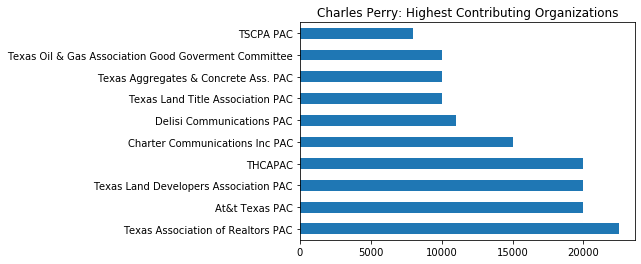

In [28]:
org_chart = org_contribs_grouped.head(10).contributionAmount.plot.barh()
org_chart.set_yticklabels(org_contribs_grouped.contributorNameOrganization)
org_chart.set_title('Charles Perry: Highest Contributing Organizations')

Text(0.5, 1.0, 'Charles Perry: Highest Contributing Individuals')

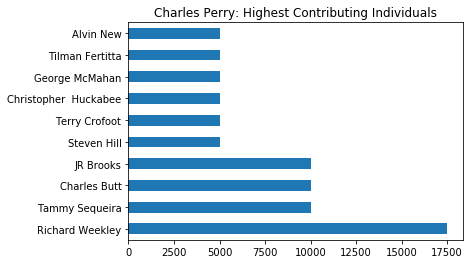

In [29]:
individual_chart = individual_contribs_grouped.head(10).contributionAmount.plot.barh()
individual_chart.set_yticklabels(individual_contribs_grouped.contributorNameFirst + ' ' + individual_contribs_grouped.contributorNameLast)
individual_chart.set_title('Charles Perry: Highest Contributing Individuals')

In [30]:
individual_contribs_grouped['name'] = individual_contribs_grouped['contributorNameFirst'].str.cat(individual_contribs_grouped['contributorNameLast'], sep=' ')

In [31]:
org_contribs_grouped['name'] = org_contribs_grouped['contributorNameOrganization']

In [32]:
all_contribs = [individual_contribs_grouped.head(10), org_contribs_grouped.head(10)]

In [33]:
all_grouped = pd.concat(all_contribs, sort=False).sort_values('contributionAmount', ascending=False)

In [34]:
all_grouped

,contributorNameFirst,contributorNameLast,contributionAmount,name,contributorNameOrganization
115,NaN,NaN,22500.0,Texas Association of Realtors PAC,Texas Association of Realtors PAC
14,NaN,NaN,20000.0,At&t Texas PAC,At&t Texas PAC
99,NaN,NaN,20000.0,THCAPAC,THCAPAC
125,NaN,NaN,20000.0,Texas Land Developers Association PAC,Texas Land Developers Association PAC
118,Richard,Weekley,17500.0,Richard Weekley,NaN
24,NaN,NaN,15000.0,Charter Communications Inc PAC,Charter Communications Inc PAC
28,NaN,NaN,11000.0,Delisi Communications PAC,Delisi Communications PAC
145,Tammy,Sequeira,10000.0,Tammy Sequeira,NaN
56,JR,Brooks,10000.0,JR Brooks,NaN
20,Charles,Butt,10000.0,Charles Butt,NaN


Text(0.5, 1.0, 'Charles Perry: Top 10 Contributors')

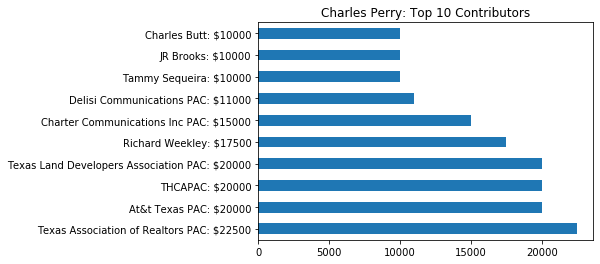

In [35]:
all_chart = all_grouped.head(10).contributionAmount.plot.barh()
all_chart.set_yticklabels(all_grouped.name + ': $' + all_grouped.contributionAmount.astype(int).astype(str))
all_chart.set_title('Charles Perry: Top 10 Contributors')

In [36]:
all_chart.figure.savefig('perry_all.png', bbox_inches='tight', pad_inches=0.5)

In [37]:
individual_totals = individual_contribs_grouped.contributionAmount.sum()

In [38]:
org_totals = org_contribs_grouped.contributionAmount.sum()

In [39]:
comparison_totals = (individual_totals, org_totals)

In [40]:
pl.rcdefaults()

Text(0.5, 1.0, 'Individual Donations vs Organizational Donations')

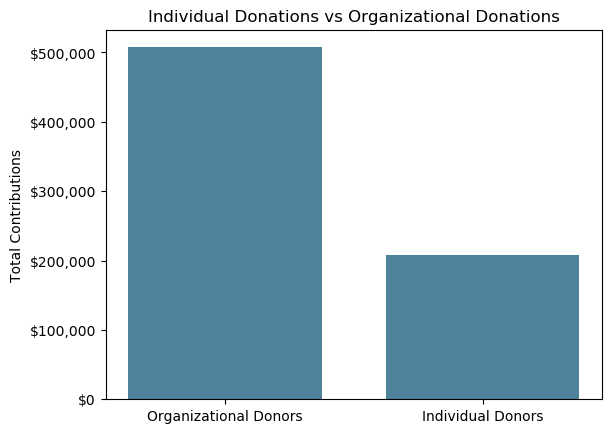

In [41]:
fig, ax = pl.subplots()

groups = ('Individual Donors', 'Organizational Donors')

y_pos = (1, 2)

totals = comparison_totals

ax.bar(y_pos, totals, align='center', width=0.75, color='#4f839c')

ax.set_xticks(y_pos)

ax.set_xticklabels(groups)

ax.set_yticklabels(['$0', '$100,000', '$200,000', '$300,000', '$400,000', '$500,000'])

ax.invert_xaxis()

ax.set_ylabel('Total Contributions')

ax.set_title('Individual Donations vs Organizational Donations')

In [42]:
df = pd.DataFrame([comparison_totals], columns=['Individuals', 'Organizations'])

<Figure size 2000x300 with 0 Axes>

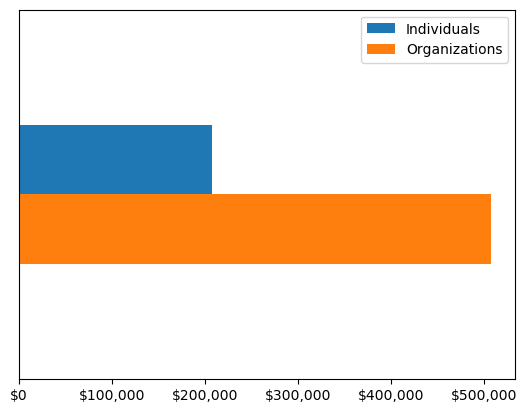

In [47]:
y_pos = [0, 1]
chart_fig = pl.figure(figsize=(20, 3))
comparison_bar = df.plot.barh(fig=chart_fig, align='edge', width=0.3)
comparison_bar.invert_yaxis()
comparison_bar.set_xticklabels(['$0', '$100,000', '$200,000', '$300,000', '$400,000', '$500,000'])
comparison_bar.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelleft=False
)
comparison_bar.patch.set_visible(False)

In [50]:
comparison_bar
pl.show(chart_fig)